In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.precision", 2)

In [13]:
header = ["engine_unit", "time_in_cycles", "op1", "op2", "op3", "sensor01", "sensor02", "sensor03", "sensor04",
          "sensor05", "sensor06", "sensor07", "sensor08", "sensor09", "sensor10", "sensor11", "sensor12",
          "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20",
          "sensor21", 'junk1', 'junk2']

# A header wasn't supplied with the original data, but we can infer one from the PHM08 documentation.
df = pd.read_csv('/home/charlie/Development/Data/PHM08/test.txt', delimiter=' ', names=header)

df.head()

,engine_unit,time_in_cycles,op1,op2,op3,sensor01,sensor02,sensor03,sensor04,sensor05,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,junk1,junk2
0,1,1,1.60e-03,2.00e-04,100.0,518.67,642.88,1587.21,1412.44,14.62,...,8124.04,8.44,0.03,393,2388,100.00,38.97,23.30,NaN,NaN
1,1,2,2.50e+01,6.22e-01,80.0,462.54,536.45,1262.64,1055.44,7.05,...,7865.20,10.89,0.02,308,1915,84.93,14.29,8.67,NaN,NaN
2,1,3,4.00e-04,0.00e+00,100.0,518.67,642.65,1589.75,1409.54,14.62,...,8121.12,8.46,0.03,393,2388,100.00,38.91,23.27,NaN,NaN
3,1,4,1.00e+01,2.50e-01,20.0,489.05,604.44,1499.93,1315.34,10.52,...,8123.53,8.68,0.03,369,2319,100.00,28.60,17.09,NaN,NaN
4,1,5,2.40e-03,1.10e-03,100.0,518.67,642.74,1585.47,1408.12,14.62,...,8118.30,8.46,0.03,392,2388,100.00,38.82,23.31,NaN,NaN


In [14]:
print(df.shape)

(29820, 28)


In [15]:
print(df.columns)

Index(['engine_unit', 'time_in_cycles', 'op1', 'op2', 'op3', 'sensor01',
       'sensor02', 'sensor03', 'sensor04', 'sensor05', 'sensor06', 'sensor07',
       'sensor08', 'sensor09', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor20', 'sensor21', 'junk1', 'junk2'],
      dtype='object')


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29820 entries, 0 to 29819
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine_unit     29820 non-null  int64  
 1   time_in_cycles  29820 non-null  int64  
 2   op1             29820 non-null  float64
 3   op2             29820 non-null  float64
 4   op3             29820 non-null  float64
 5   sensor01        29820 non-null  float64
 6   sensor02        29820 non-null  float64
 7   sensor03        29820 non-null  float64
 8   sensor04        29820 non-null  float64
 9   sensor05        29820 non-null  float64
 10  sensor06        29820 non-null  float64
 11  sensor07        29820 non-null  float64
 12  sensor08        29820 non-null  float64
 13  sensor09        29820 non-null  float64
 14  sensor10        29820 non-null  float64
 15  sensor11        29820 non-null  float64
 16  sensor12        29820 non-null  float64
 17  sensor13        29820 non-null 

In [17]:
df.describe()

,engine_unit,time_in_cycles,op1,op2,op3,sensor01,sensor02,sensor03,sensor04,sensor05,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,junk1,junk2
count,29820.00,29820.00,29820.00,29820.00,29820.00,29820.00,29820.00,29820.00,29820.00,29820.00,...,29820.00,29820.00,2.98e+04,29820.00,29820.00,29820.00,29820.00,29820.00,0.0,0.0
mean,109.87,81.87,24.08,0.57,48.93,472.78,579.37,1417.74,1202.00,8.01,...,8063.75,9.32,2.31e-02,347.72,2228.51,97.76,20.78,12.47,NaN,NaN
std,62.82,57.79,14.76,0.31,32.49,26.41,37.26,105.78,118.73,3.62,...,83.97,0.75,4.62e-03,27.69,145.22,5.36,9.89,5.93,NaN,NaN
min,1.00,1.00,0.00,0.00,0.00,445.00,535.72,1243.78,1029.03,3.91,...,7854.11,8.34,2.00e-02,304.00,1915.00,84.93,10.12,6.12,NaN,NaN
25%,55.00,35.00,10.00,0.25,20.00,445.00,549.46,1351.49,1122.07,3.91,...,8061.71,8.66,2.00e-02,330.00,2212.00,100.00,10.84,6.50,NaN,NaN
50%,112.00,72.00,25.00,0.70,40.00,462.54,555.80,1366.84,1133.30,7.05,...,8080.55,9.30,2.00e-02,334.00,2223.00,100.00,14.90,8.93,NaN,NaN
75%,164.00,118.00,42.00,0.84,80.00,491.19,607.23,1497.78,1304.74,10.52,...,8125.89,9.37,3.00e-02,369.00,2324.00,100.00,28.52,17.11,NaN,NaN
max,218.00,364.00,42.01,0.84,100.00,518.67,644.04,1606.64,1431.08,14.62,...,8226.66,11.02,3.00e-02,397.00,2388.00,100.00,39.33,23.59,NaN,NaN


In [19]:
# As you can see from df.info() and df.describe(), columns 26 and 27 are empty columns,
# caused by trailing whitespace. We can safely remove these.
df = df.drop(columns=['junk1', 'junk2'])

# Aside from junk1 and junk2, all columns are non-null, meaning that there are no gaps in values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29820 entries, 0 to 29819
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine_unit     29820 non-null  int64  
 1   time_in_cycles  29820 non-null  int64  
 2   op1             29820 non-null  float64
 3   op2             29820 non-null  float64
 4   op3             29820 non-null  float64
 5   sensor01        29820 non-null  float64
 6   sensor02        29820 non-null  float64
 7   sensor03        29820 non-null  float64
 8   sensor04        29820 non-null  float64
 9   sensor05        29820 non-null  float64
 10  sensor06        29820 non-null  float64
 11  sensor07        29820 non-null  float64
 12  sensor08        29820 non-null  float64
 13  sensor09        29820 non-null  float64
 14  sensor10        29820 non-null  float64
 15  sensor11        29820 non-null  float64
 16  sensor12        29820 non-null  float64
 17  sensor13        29820 non-null 

<AxesSubplot:xlabel='engine_unit'>

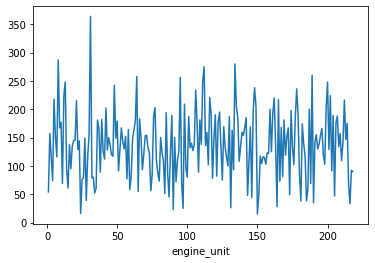

In [44]:
# Raw data appears to be of sufficient quality to analyze. There may be noise, but there are no gaps, and all
# fields are strongly typed. As a final check, let's gauge the number of entries for each engine_unit.
df.groupby(['engine_unit']).size().plot()

In [46]:
# the (presumably) newest engine has only 15 entries
df.groupby(['engine_unit']).size().min()

15

In [47]:
# the oldest engine has 364 entries
df.groupby(['engine_unit']).size().max()

364

In [48]:
# the median number of entries for an engine. Assuming cycle numbers are unique, the median engine wear is 134.5
# cycles, all else being equal.
df.groupby(['engine_unit']).size().median()

134.5

In [51]:
# the standard deviation in number of entries is 59.7. There is variation in engine li
df.groupby(['engine_unit']).size().std()

59.707207786411225